# **Laboratorio 11: Introducción al modelo de Regresión Lineal**

**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2340** Fundamentos de Machine Learning.

**Nombres de los integrantes**


1.   Nombre integrante 1
2.   Nombre integrante 2

**Número del grupo**

*Escribir el número del grupo*

# **Introducción**
La regresión lineal busca encontrar los parámetros de una ecuación  que predice el valor de una variable  $y$ a partir de las variables en el vector $x$. Las variables en $x$ se conocen como predictores y los parámetros de la ecuación se denotan por $\beta$. La búsqueda de los parámetros de la ecuación, es decir, $\beta$, usualmente se realiza usando un conjunto de observaciones de estas variables. Este modelo se usa en múltiples campos y comprender su funcionamiento es fundamental en ingeniería.


Considere el conjunto de observaciones:

\begin{align*}
   \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})\}.
 \end{align*}

Para este ejercicio, asumamos que la relación entre la variables $x$ y $y$ se define mediante la siguiente ecuación:

\begin{align*}
  y^* = g(x; \beta)=β_{0} + \beta_1 x,\\
\end{align*}

donde los $\beta_i$ son los coeficientes de la ecuación que deben ser encontrados a través la resolución de un problema de optimización. Dicho problema se denomina problema de *mínimos cuadrados*, el cual busca los valores de $\beta$ tales que se minimice la distancia al cuadrado entre los valores de $y^{(j)}$ (es decir, el valor de $y$ observado) y $g(x^{(j)};\beta)$ (es decir, el valor de $y$ estimado por la ecuación).  De forma matemática, el problema se formula como :

\begin{align*}
  \min_{\beta\in\mathbb{R}^n} \left | \left|  y^{(j)}-g\left (x^{(j)};\beta \right)  \right| \right|_2^2 .
 \end{align*}

 La siguiente figura ilustra el resultado de resolver el problema de regresión:


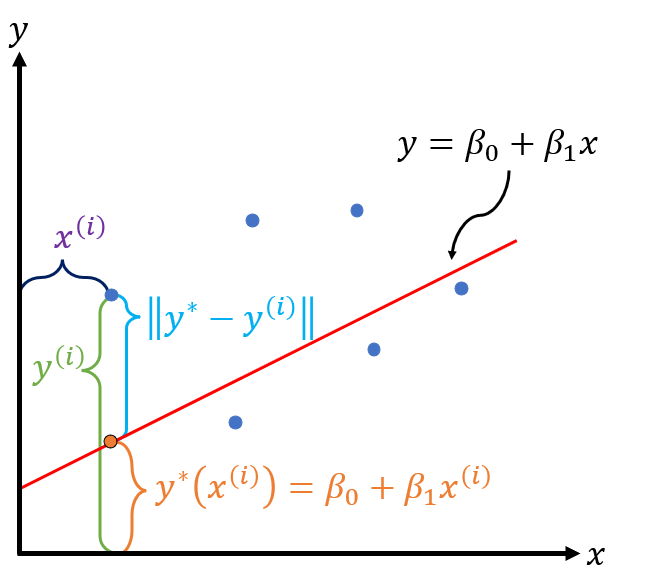


Aquí, $\beta = [\beta_0, \beta_1]^T$. Hay que notar que el problema de optimización anterior se puede reescribir como:

\begin{align*}
  \min_{\beta\in\mathbb{R}^n}\left | \left| y^{(j)}-\left ( β_{0} + \beta_1 x^{(j)} \right)\right| \right|_2^2 .
 \end{align*}


La operación $β_{0} + \beta_1 x^{(j)}$, se puede escribir vectorialmente como:


\begin{align*}
  \beta_{0} + \beta_1 x^{(j)} = [1, x^{(j)}] \beta
\end{align*}

Lo anterior está escrito para la observación $j$. Para incluir a todos los $m$ puntos, se plantea el siguiente sistema de ecuaciones lineales de forma matricial:

\begin{align*}
   \begin{bmatrix}
      β_{0} + \beta_1 x^{(1)}\\
      β_{0} + \beta_1 x^{(2)}\\
      \vdots\\
      β_{0} + \beta_1 x^{(m)}
   \end{bmatrix}
   =
   \begin{bmatrix}
      1 & x^{(1)}\\
      1 &  x^{(2)}\\
      \vdots & \vdots\\
      1 & x^{(m)}
   \end{bmatrix}
   \begin{bmatrix}
    \beta_0\\
    \beta_1
   \end{bmatrix}
\end{align*}

La matriz que acompaña a $\beta$ se nombrará $H$. El problema de optimización se reescribe entonces como :

 \begin{align*}
   \min_{\beta\in\mathbb{R}^n}||y-H\beta||_2^2,
 \end{align*}

donde $y=[y^{(1)}, y^{(2)}, ..., y^{(m)}]^T$.

La solución a este problema se denota $\beta^*=[\beta_0^*,\beta_1^*]^T$, los cuales son los coeficientes que resuelven el problema. El potencial de este método radica en su solución analítica, la cual se puede hallar encontrando su gradiente de la función objetivo e igualándolo a cero. Esta solución es:

\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty .
 \end{align*}

Usando el mismo procedimiento, se pueden realizar proceso de regresión para ecuaciones con un grado polinómico más alto, como por ejemplo:

\begin{align*}
   y = g(x;\beta)=\sum_{i=0}^{n} \beta_i x^i
\end{align*}

Si rescribe lo anterior de forma matricial para todos los $m$ puntos, queda:

\begin{align*}
   \begin{bmatrix}
      1 & x^{(1)} & \left(x^{(1)}\right)^2 & \cdots & \left(x^{(1)}\right)^n\\
      1 & x^{(2)} & \left(x^{(2)}\right)^2 & \cdots & \left(x^{(2)}\right)^n\\
      \vdots & \vdots & \vdots & \ddots & \vdots \\
      1 & x^{(m)} & \left(x^{(m)}\right)^2 & \cdots & \left(x^{(m)}\right)^n\\
   \end{bmatrix}
   \begin{bmatrix}
    \beta_0\\
    \beta_1\\
    \vdots\\
    \beta_n
   \end{bmatrix}
\end{align*}

Donde la matriz que acompaña el vector $\beta$ es la nueva matriz $H$, por lo que, al final, la solución analítica se encuentra mediante la misma ecuación mencionada. Cabe resaltar que, con la lógica anterior, es posible encontrar analíticamente los coeficientes para cualquier ecuación deseada, por ejemplo, si se quisiera una combinación de funciones trigonométricas, es decir:

\begin{align*}
  y^*=\beta_0 + \beta_1\cos(x) + \beta_2\sin(x)
\end{align*}

Solo bastaría con modificar la matriz $H$ y solucionar el problema de la misma manera.


# **Contexto del problema**

En el análisis de movimiento humano es importante medir fuerzas, torques y potencias, que permiten evaluar el desgaste metabólico del paciente al realizar algún ejercicio y, también, diseñar de forma eficiente prótesis biónicas para atender sus condiciones particulares de movimiento. Para determinar el valor de estas variables se estima inicialmente la aceleración del cuerpo de estudio a través del análisis de video o con el uso de acelerómetros. En el caso del análisis de video, es usual capturar primero la posición vertical y horizontal del cuerpo para eventualmente estimar la aceleración. Es fundamental que durante la medición de señales de posición, las posiciones estudiadas no varíen rápidamente entre sí para evitar la captura de ruido y obtener mediciones precisas.

# **Descripción de la práctica**

En esta prática se desea construir un modelo de Regresión que permita predecir la trayectoria que sigue el codo al abrir y cerrar una puerta, tal y como se muestra en el siguiente esquema:



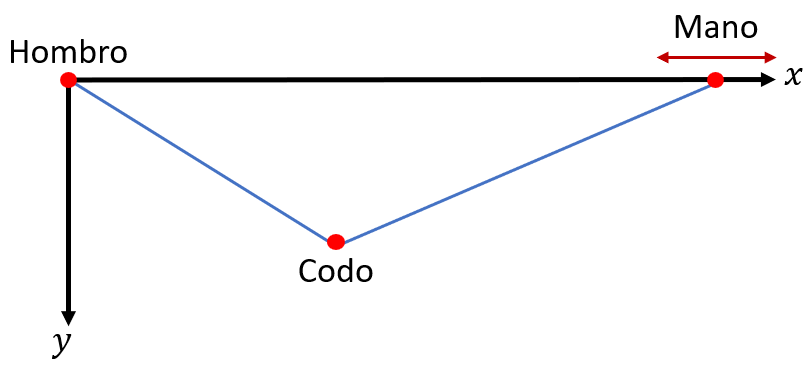

Para efectos de la prática, se definirán las siguientes variables:

- $t$: Tiempo transcurrido
- $x$: Posición horizontal del codo
- $y$: Posición vertical del codo

1. Importe los datos del archivo *regresion.xlsx*, donde la primera columna corresponde al tiempo $(t)$, la segunda a la posición horizontal $(x)$ y la tercera a la vertical $(y)$. Luego, construya los siguientes gráficos de dispersión (scatter):

- Posición vertical en función del tiempo ($t$, $y$)
- Posición vertical en función de la posición horizontal ($x$, $y$)


2. Implemente una función que reciba como argumentos el grado polinómico $n$ y un arreglo con los datos de la variable independiente, y que retorne la matriz $H$ correspondiente al grado polinómico.

3. Implemente una función que reciba como argumentos la matriz $H$ y el arreglo de valores de la variable dependiente. Esta función debe retornar el arreglo de $\beta^*$.

4. Utilice las funciones que implementó en los puntos anteriores para encontrar los coeficientes óptimos de las siguientes relaciones:

- $y$ vs $t$
- $y$ vs $x$

Con cada uno con los siguientes grados polinómicos:

- Grado 1
- Grado 3
- Grado 5
- Grado 9

5. Teniendo en cuenta los resultados del punto anterior, grafique nuevamente la dispersión inicial de los datos agregando esta vez las curvas obtenidas para cada conjunto de datos. El primer gráfico, debe incluir la dispersión entre la posición vertical $y$ y el tiempo $t$ y las tres curvas de regresión obtenidas para cada grado polinómico en este conjunto de datos. El segundo gráfico debe mostrar las mismas curvas anteriores pero para el conjunto de datos de la posición vertical $y$ y la posición horizontal $x$. Los gráficos esperados deberían tener la siguiente estructura:


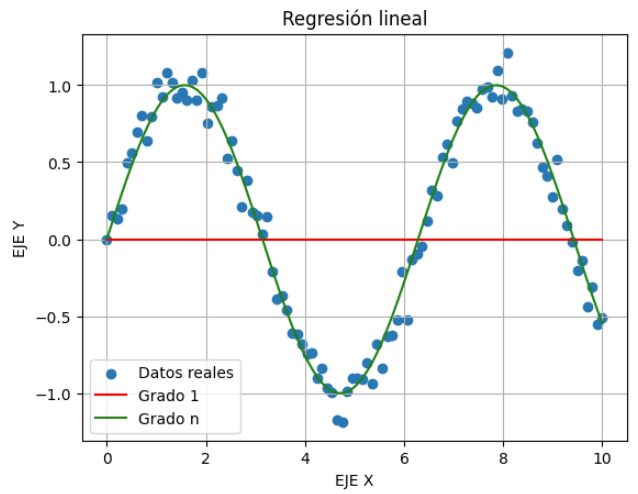

6. Note que el conjunto de datos de la posición vertical en función del tiempo tiene un comportamiento oscilatorio. Implemente una función que reciba como argumento el arreglo de datos asociados a la variable independiente y que retorne la matriz $H$ que satisfaga la relación:

\begin{align*}
  y^*=\beta_0 + \beta_1\sin(t) + \beta_2\cos(t)
\end{align*}

7. Calcule los parámetros óptimos $\beta^*$ que ajustan el conjunto de datos ($t, y$) a la relación trigonométrica anterior.

8. Grafique la dispersión inicial de la posición vertical $y$ en función del tiempo $t$ agregando la regresión polinómica de grado 9 calculada previamente y la regresión trigonométrica que acaba de obtener.

9. Implemente una función que calcule el error cuadrático medio (MSE) entre los valores $y$ medidos y las predicciones que se obtienen usando la regresión polinómica (grados 1,3,5 y 9) y trigonométrica para el conjunto de datos ($t, y$). Imprima de forma adecuada estos valores.

10. Teniendo el cuenta los valores de la función objetivo, responda:

- Para el gráfico de $y$ vs $t$, ¿cuál grado fue mejor?
- Para el gráfico de $y$ vs $x$, ¿cuál grado fue mejor?
- ¿Qué diferencias encuentra en los resultados de regresión para el conjunto de datos ($t$,$x$) en comparación con el conjunto ($x$,$y$)?
- ¿Considera que la regresión con funciones trigonométricas tuvo mejores o peores resultados que la regresión polinómica?
- Aumente el grado polinómico por encima de 10 y analice los resultados para ambos conjuntos de datos, $(t,y)$ y $(x,y)$. ¿Cree que aumentar el grado polinómico hará que el error tienda a cero?